In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("data_banknote_authentication.csv",names =["variance of Wavelet","skewness of Wavelet" \
                                                            ,"curtosis of Wavelet","entropy of image","class"])

In [5]:
data.head()

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy of image,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
data.shape

(1372, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   variance of Wavelet  1372 non-null   float64
 1   skewness of Wavelet  1372 non-null   float64
 2   curtosis of Wavelet  1372 non-null   float64
 3   entropy of image     1372 non-null   float64
 4   class                1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
data.describe()

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy of image,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
data.isnull().sum()

variance of Wavelet    0
skewness of Wavelet    0
curtosis of Wavelet    0
entropy of image       0
class                  0
dtype: int64

## Let's see how our dataset is distrubuted 

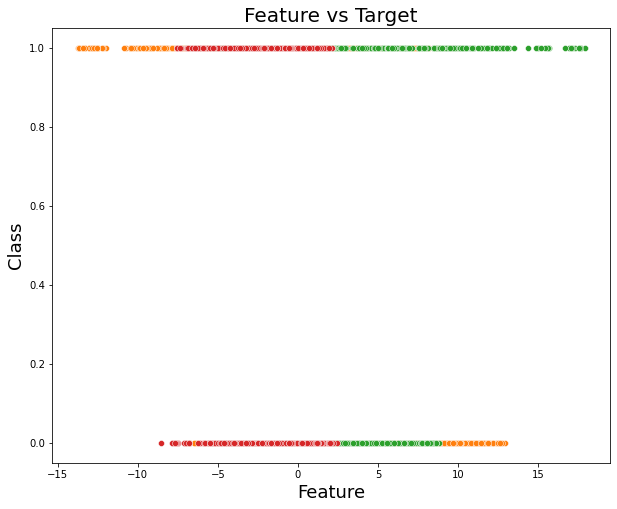

In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="variance of Wavelet",y="class",data=data)
sns.scatterplot(x="skewness of Wavelet",y="class",data=data)
sns.scatterplot(x="curtosis of Wavelet",y="class",data=data)
sns.scatterplot(x="entropy of image",y="class",data=data)
plt.xlabel("Feature",fontsize=18)
plt.ylabel("Class",fontsize=18)
plt.title("Feature vs Target",fontsize=20)
plt.show()

* dataset is multivariate
* Data points distrubuted with target variable thats why we use claasification algorithms 

#### No null values and no categorical values here therefore no need to

## Split data into x and y

In [14]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [16]:
x.shape

(1372, 4)

In [17]:
y.shape

(1372,)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [33]:
print("Shape of x_train -",x_train.shape)
print("Shape of y_train -",y_train.shape)
print("Shape of x_test -",x_test.shape)
print("Shape of y_test -",y_test.shape)

Shape of x_train - (1097, 4)
Shape of y_train - (1097,)
Shape of x_test - (275, 4)
Shape of y_test - (275,)


* Selecting all classification algorithms and pass the dataset into each algorithm model out of which algorithms has more accuracy we select one

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

#### Train the logistic model

In [38]:
model_1=LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

#### pass the test daset to logistic model

In [40]:
y_prediction_1=model_1.predict(x_test)

### for KNeighborsClassifier model we have to select k value

In [42]:
accuracy_list=[]
error_list=[]
for k in range(1,15,1):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    knn_prediction=knn.predict(x_test)
    accuracy=accuracy_score(y_test,knn_prediction)
    accuracy_list.append(accuracy)
    error=1-accuracy
    error_list.append(error)
    print(f"for {k}value accuracy :- {accuracy}")

for 1value accuracy :- 1.0
for 2value accuracy :- 1.0
for 3value accuracy :- 1.0
for 4value accuracy :- 1.0
for 5value accuracy :- 1.0
for 6value accuracy :- 1.0
for 7value accuracy :- 1.0
for 8value accuracy :- 1.0
for 9value accuracy :- 1.0
for 10value accuracy :- 1.0
for 11value accuracy :- 1.0
for 12value accuracy :- 1.0
for 13value accuracy :- 1.0
for 14value accuracy :- 1.0


### for all k values accuracy is same but  i am taking k=5

In [43]:
model_2=KNeighborsClassifier(n_neighbors=5)
model_2.fit(x_train,y_train)
model_2_prediction=knn.predict(x_test)

## Checking the performance of each model

* 1.Logistic regression model

In [45]:
accuracy_1=accuracy_score(y_test,y_prediction_1)
accuracy_2=accuracy_score(y_test,model_2_prediction)

In [46]:
print("accuracy of logistic regression model - ",accuracy_1)
print("accuracy of KNeighborsClassifier model - ",accuracy_1)

accuracy of logistic regression model -  0.9927272727272727
accuracy of KNeighborsClassifier model -  0.9927272727272727
